# Исследование продаж игр

В вашем распоряжении данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Ваша задача — установить параметры. Цель - выявить определяющие успешность игры закономерности.

Обработаем данные собранные в открытых источниках и выявим особенности продаж в разных регионах и основные закономерности

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

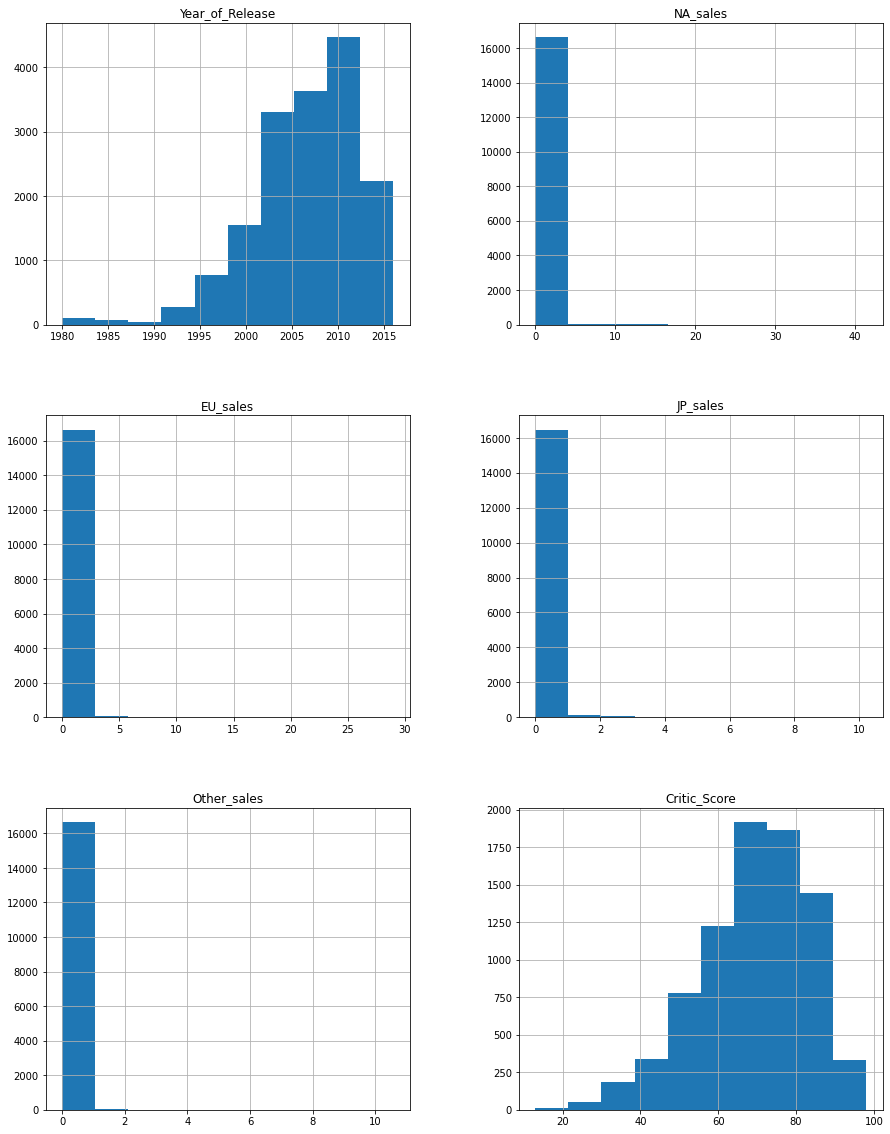

In [6]:
data.hist(figsize=(15, 20))

In [7]:
data.duplicated().sum()

0

**Вывод:**  
Есть пропущенные значения в:
- Name - 2 шт. (удалим данные строки) 
- Year_of_Release- 269 шт. (удалим данные строки)
- Genre - 2 шт. (удалим данные строки)
- Critic_Score - 8578 шт. (рассмортим природу пропусков позже)
- User_Score - 6701 шт.(рассмортим природу пропусков позже)
- Rating - 6766 шт.(рассмортим природу пропусков позже)  

Некорректынй тип данных в:
- Year_of_Release - переведем в int
- User_Score  - переведем в float64

### Подготовим данные

#### Заменим названия столбцов (приведем к нижнему регистру)

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
data['name'] = data['name'].str.lower()

In [11]:
data['name'].value_counts() 

need for speed: most wanted                   12
madden nfl 07                                  9
lego marvel super heroes                       9
fifa 14                                        9
ratatouille                                    9
                                              ..
ultimate brain games                           1
jikkyou powerful pro yakyuu '97 kaimakuban     1
exit                                           1
super robot taisen mx                          1
north american hunting extravaganza            1
Name: name, Length: 11559, dtype: int64

Можно заметить что есть повторы в названиях, сравним данные повторы между собой, и попробуем заполнить пропуски исходя из этих данных

In [12]:
data['name'].duplicated().sum()

5155

In [13]:
data.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Данные в столбцах "year_of_release", "critic_score", "user_score", "rating" даже для одной игры отличаются, поэтому однозначно заполнить пропуски в данных столбцах не является возможным

In [14]:
import numpy as np
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [16]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [17]:
data['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [18]:
data['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [19]:
data['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [20]:
data['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

In [21]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [22]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим значения 'tbd' (“To Be Determined”, то есть будет определена позже) на NaN, так как по сути смысл один и тот же в этих значениях (данные отсутствуют)

In [23]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [24]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [25]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### Обработаем пропуски 

In [26]:
data = data.dropna(subset=['name']).reset_index(drop=True)

In [27]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [28]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропуски в остальных столбцах удалять преждевременно, так как удалим почти половину данных, а заменить какими-либо значениями не получится, так как оценки и рейтинг не зависят от представленных остальных данных.
Пропуски в оценках и рейтинге могли появиться из-за того, что какие-то игры не набрали должной популярности, либо из за ошибки в выгрузке. 

In [29]:
data['non_critic_score'] = data['critic_score'].isnull()

In [30]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,non_critic_score
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,False
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,True
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,False
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,True


In [31]:
data['non_user_score'] = data['user_score'].isnull()

In [32]:
data.loc[data['rating'].isna(), 'rating'] = 'Unknown'

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,non_critic_score,non_user_score
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,False,False
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,True,True
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,False
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,False,False
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,True,True


#### Преобразуем данные в нужные типы

In [34]:
data['year_of_release'] = data['year_of_release'].astype('int')
#года - целые числа, поэтому подходит тип данных int

In [35]:
data['user_score'] = data['user_score'].astype('float64')
#оценка пользователей - дробные числа, поэтому подходит тип данных float64

In [36]:
data['critic_score'] = data['critic_score'].astype('Int64')
#оценка критиков - целые числа, поэтому подходит тип данных int

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16444 non-null  object 
 1   platform          16444 non-null  object 
 2   year_of_release   16444 non-null  int64  
 3   genre             16444 non-null  object 
 4   na_sales          16444 non-null  float64
 5   eu_sales          16444 non-null  float64
 6   jp_sales          16444 non-null  float64
 7   other_sales       16444 non-null  float64
 8   critic_score      7983 non-null   Int64  
 9   user_score        7463 non-null   float64
 10  rating            16444 non-null  object 
 11  non_critic_score  16444 non-null  bool   
 12  non_user_score    16444 non-null  bool   
dtypes: Int64(1), bool(2), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


#### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец 'total_sales'

In [38]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [39]:
print(data.head())

                       name platform  year_of_release         genre  na_sales  \
0                wii sports      Wii             2006        Sports     41.36   
1         super mario bros.      NES             1985      Platform     29.08   
2            mario kart wii      Wii             2008        Racing     15.68   
3         wii sports resort      Wii             2009        Sports     15.61   
4  pokemon red/pokemon blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45            76         8.0        E   
1      3.58      6.81         0.77          <NA>         NaN  Unknown   
2     12.76      3.79         3.29            82         8.3        E   
3     10.93      3.28         2.95            80         8.0        E   
4      8.89     10.22         1.00          <NA>         NaN  Unknown   

   non_critic_score  non_user_score  total_sales  
0             False    

In [40]:
data['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

**Вывод:**  

Были исправленны типы данных в некоторых столбцах, заполнить пропуски не удалось, пока будем работать с этими данными. Также был добавлен столбец и общими продажами по всему миру.

### Проведем исследовательский анализ данных

####  Посмотрим сколько игр выпускалось в разные годы

<AxesSubplot:>

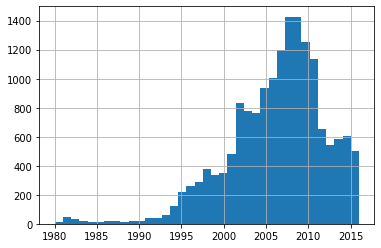

In [41]:
data['year_of_release'].hist(bins=37)

В целом, мы видим, что выпуск игр от 1980 до 2000 годов увеличивался, но не сильно критично, что связанно с малым распростронением компьютеров и приставок в целом, и с силой железа. В 2002 случился резкий скачек выпуска игр почти в 2 раза. Скорее всего это связанно с выходом самой продаваемой приставкой в мире PS2 (продажи начались в 2000 году). 

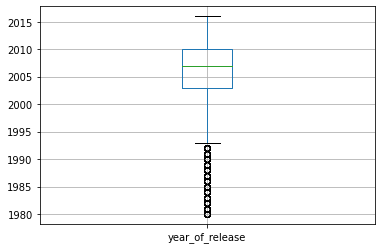

In [42]:
import matplotlib.pyplot as plt
data.boxplot(column=['year_of_release'])
plt.show()

Text(0.5, 1.0, 'Продажи по платформам')

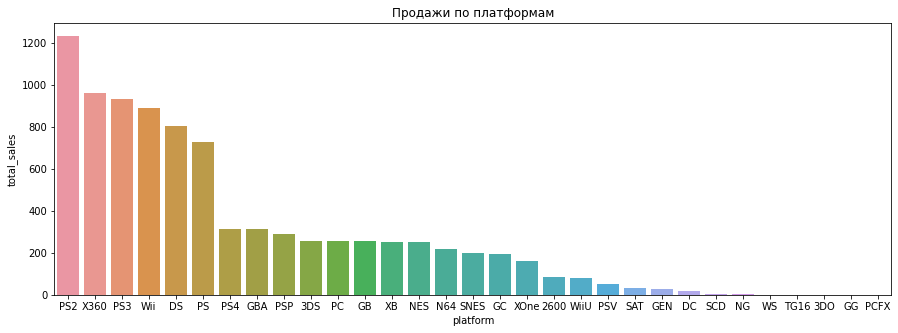

In [43]:
import seaborn
platform_sort = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=platform_sort.index,y=platform_sort['total_sales'])
plt.title('Продажи по платформам')

Платформами с наибольшими суммарными продажами являются PS2, X360, PS3, Wii, DS, PS

In [44]:
platform_sort.head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


####  Посмотрим как менялись продажи по платформам

In [45]:
platform_sort = platform_sort.query('total_sales >= 150')
platform_sort = platform_sort.reset_index()
name_platform = platform_sort['platform'].unique()
name_platform

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne'],
      dtype=object)

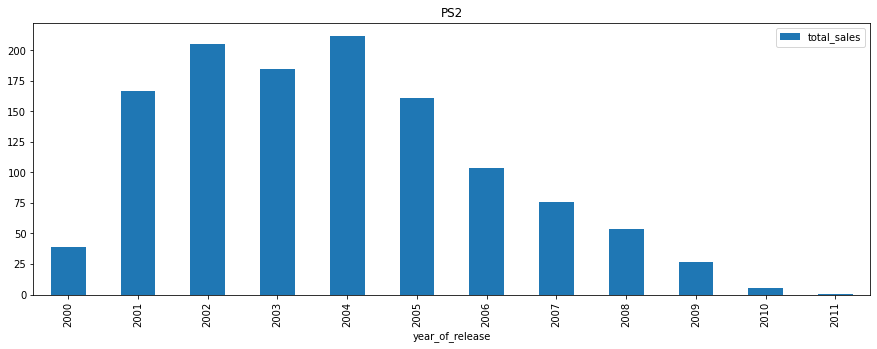

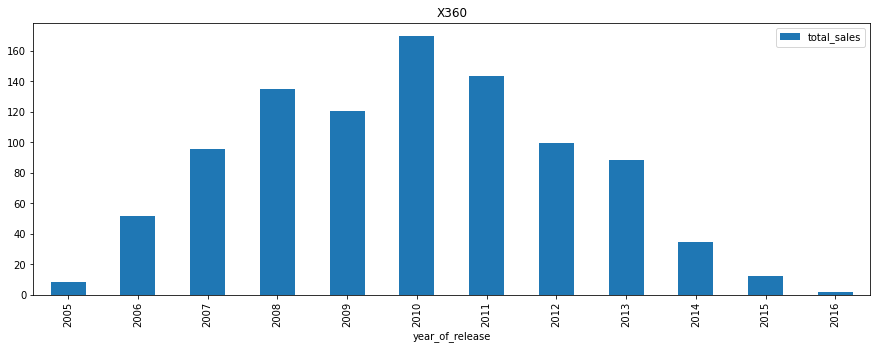

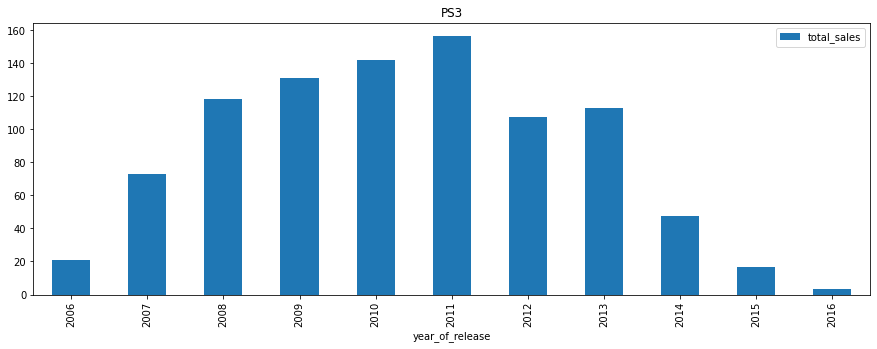

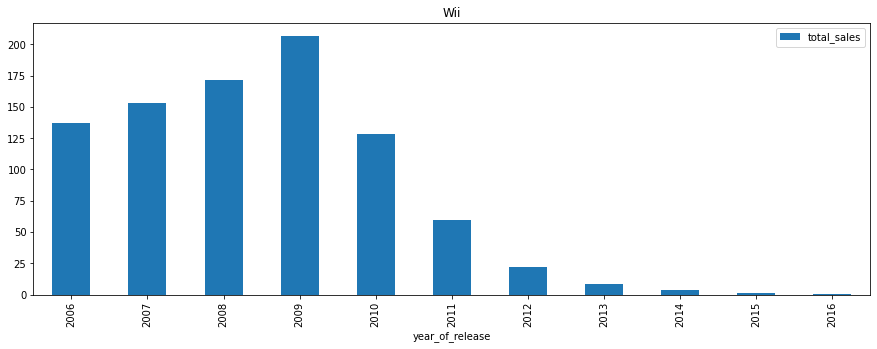

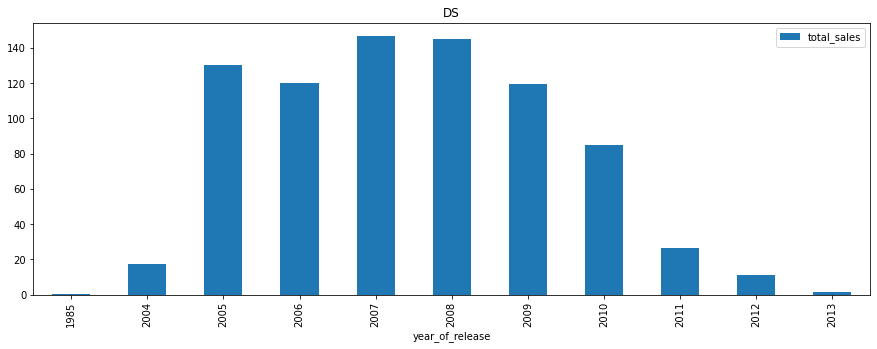

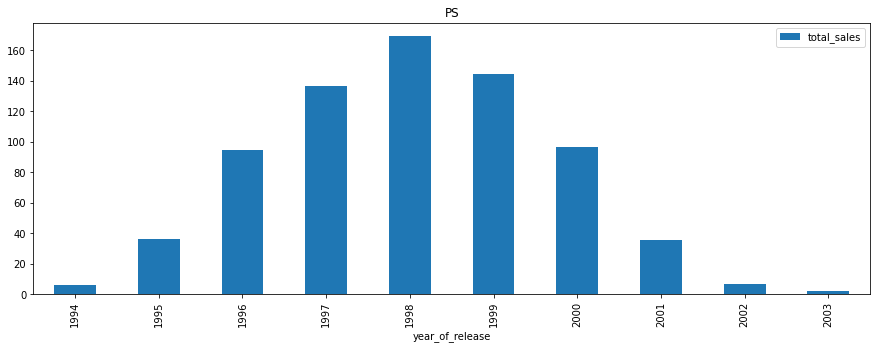

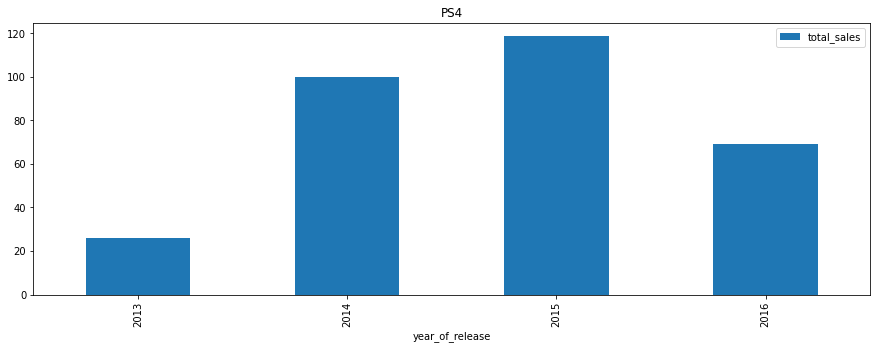

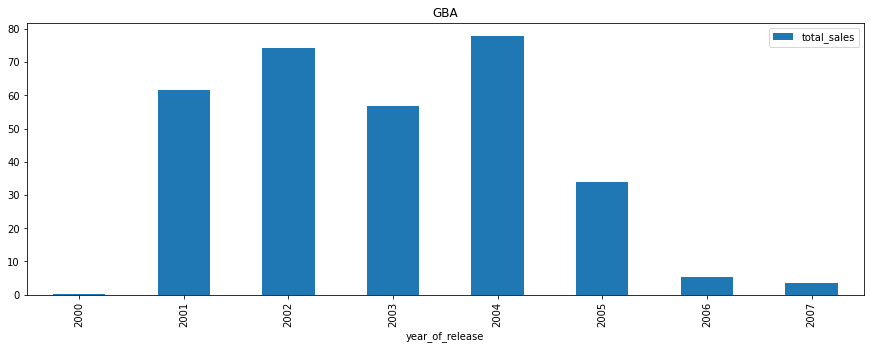

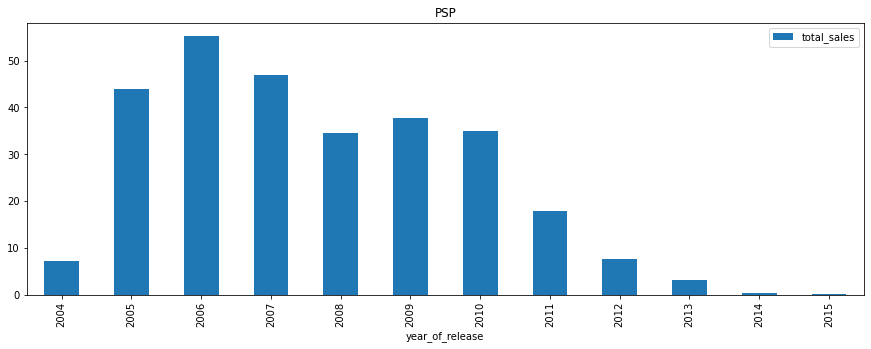

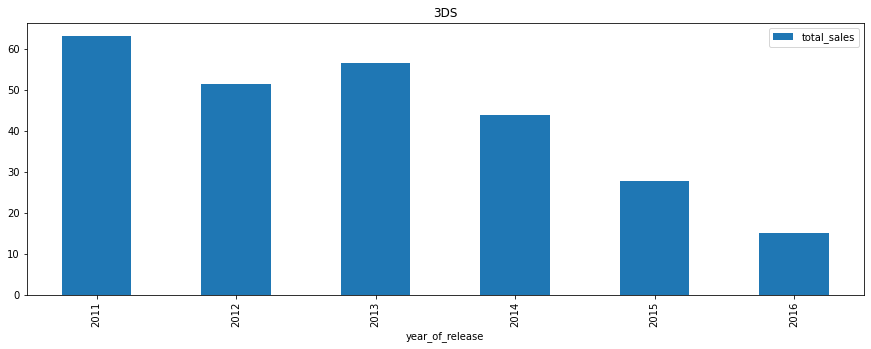

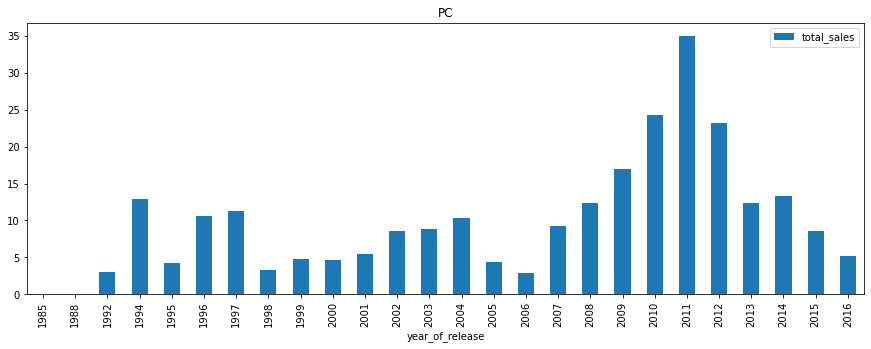

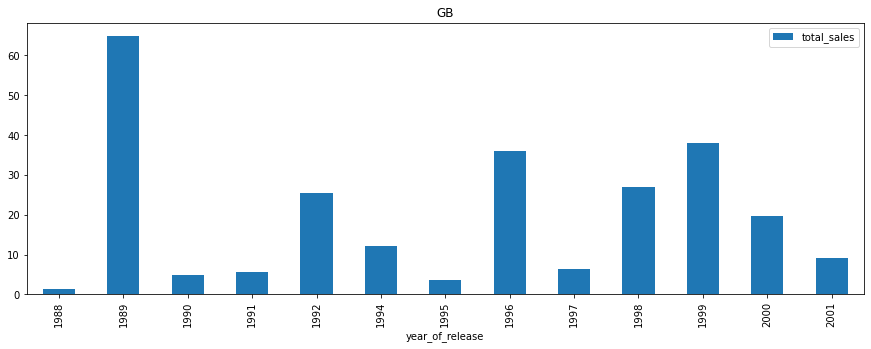

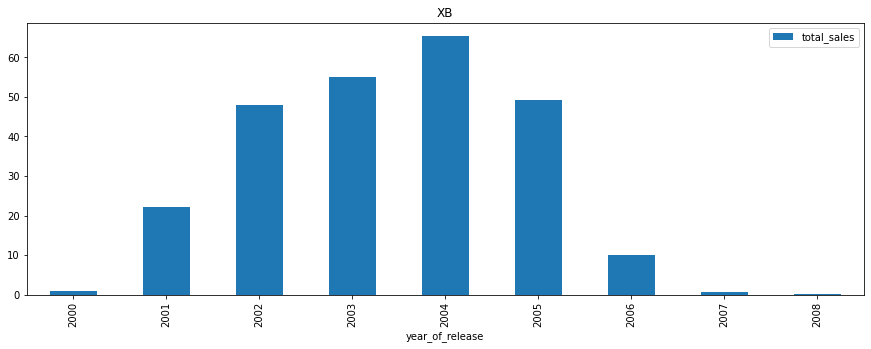

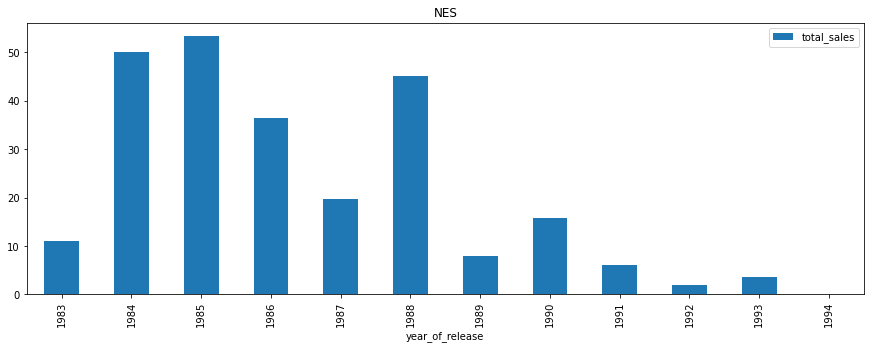

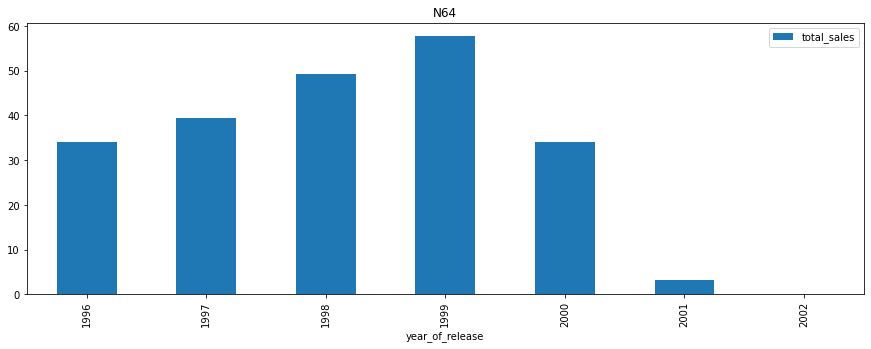

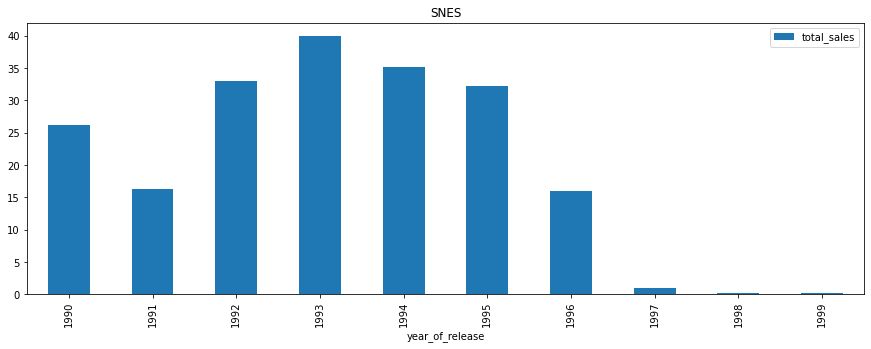

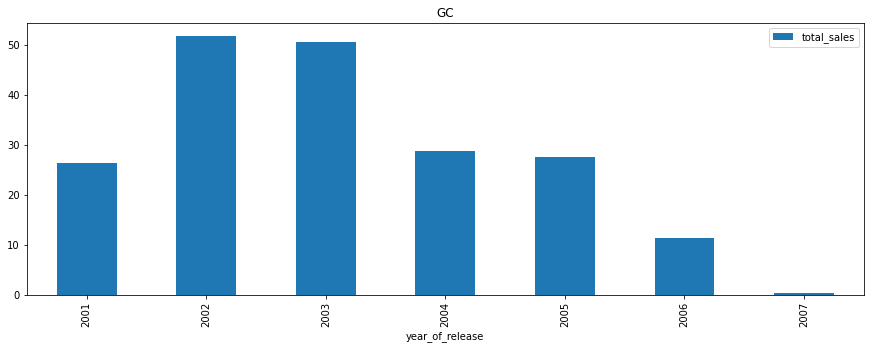

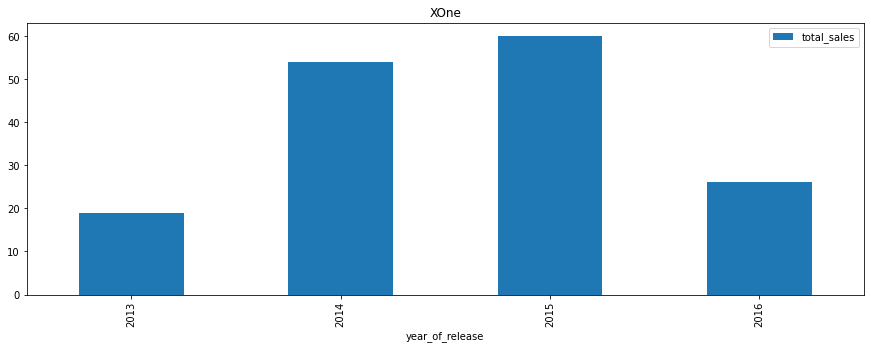

In [46]:
for platform in name_platform:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(15,5))
    plt.title(platform)

Отметим закономерность что средний срок жизни платформы составляет около 8-9 лет, пик популярности приходит примерно на 5 год, после чего идет постепенное падение. Исключением является PC, так как у компьютеров железо обновляется, и платформа живет долгое время.
Дальнейший рост ожидается у следующих платформ:
* PS4
* XOne

И в целом продажи по платформам:
* 3DS
* PC
* X360
* PS3
* Wii


<div class="alert alert-info"> Рассмотрим данные по продажам за последние 3 года

#### Возьмем данные за соответствующий актуальный период.

In [47]:
data_sort = data.query('year_of_release >= 2014')

In [48]:
data_sort['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [49]:
data_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1689 non-null   object 
 1   platform          1689 non-null   object 
 2   year_of_release   1689 non-null   int64  
 3   genre             1689 non-null   object 
 4   na_sales          1689 non-null   float64
 5   eu_sales          1689 non-null   float64
 6   jp_sales          1689 non-null   float64
 7   other_sales       1689 non-null   float64
 8   critic_score      718 non-null    Int64  
 9   user_score        888 non-null    float64
 10  rating            1689 non-null   object 
 11  non_critic_score  1689 non-null   bool   
 12  non_user_score    1689 non-null   bool   
 13  total_sales       1689 non-null   float64
dtypes: Int64(1), bool(2), float64(6), int64(1), object(4)
memory usage: 176.5+ KB


#### Определим какие платформы лидируют по продажам

Text(0.5, 1.0, 'Продажи по платформам')

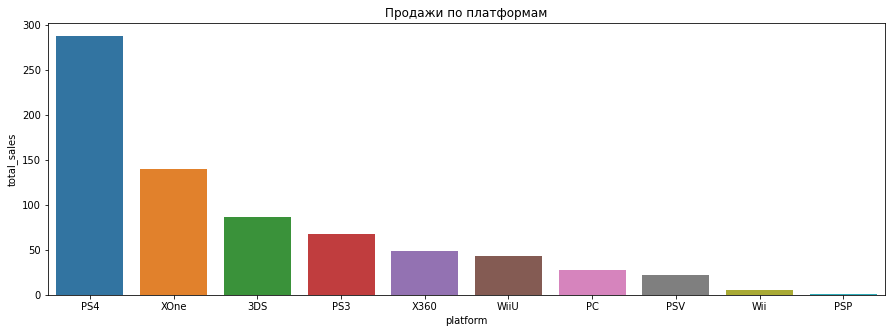

In [50]:
platform_sort_final = data_sort.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=platform_sort_final.index,y=platform_sort_final['total_sales'])
plt.title('Продажи по платформам')

In [51]:
platform_sort_final = platform_sort_final.reset_index()
name_platform_final = platform_sort_final['platform'].unique()
print(name_platform_final)

['PS4' 'XOne' '3DS' 'PS3' 'X360' 'WiiU' 'PC' 'PSV' 'Wii' 'PSP']


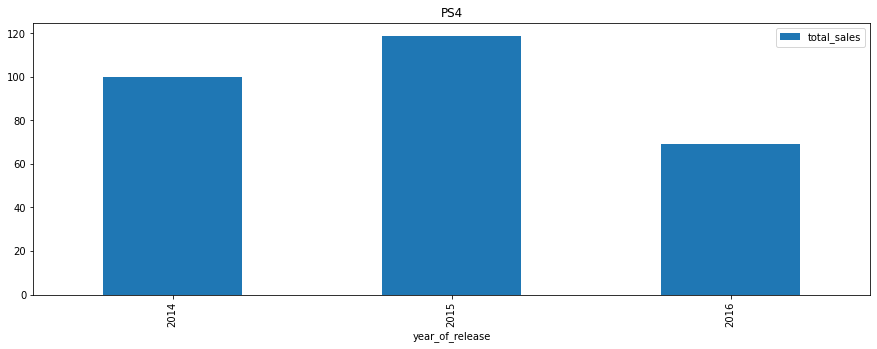

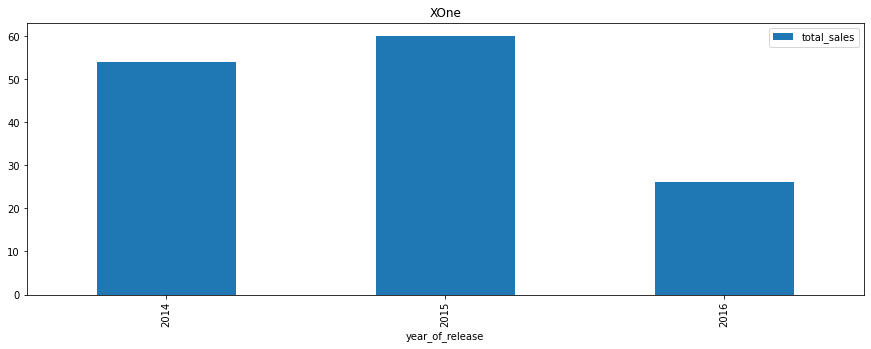

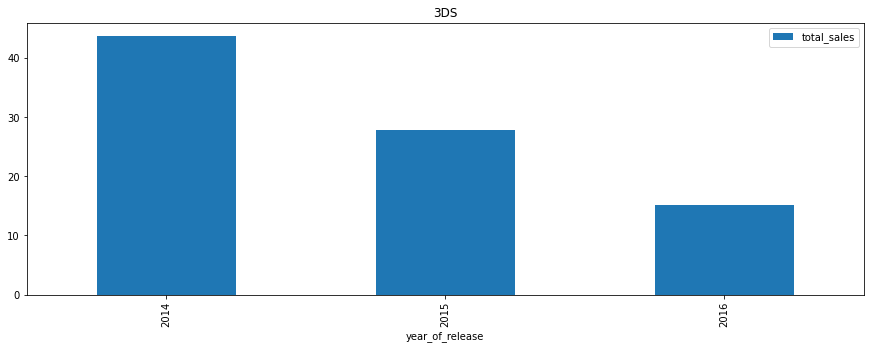

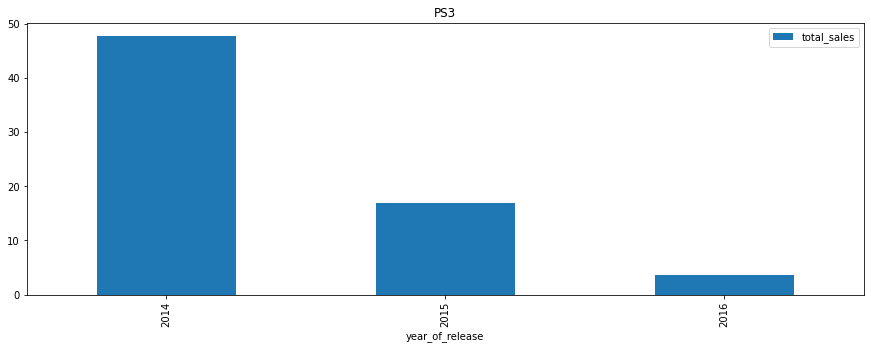

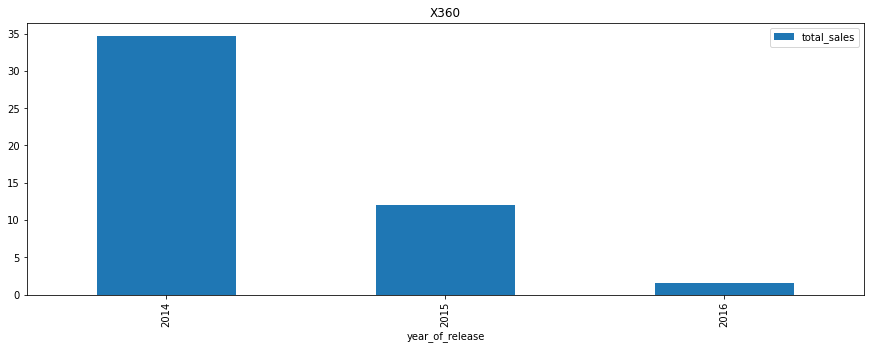

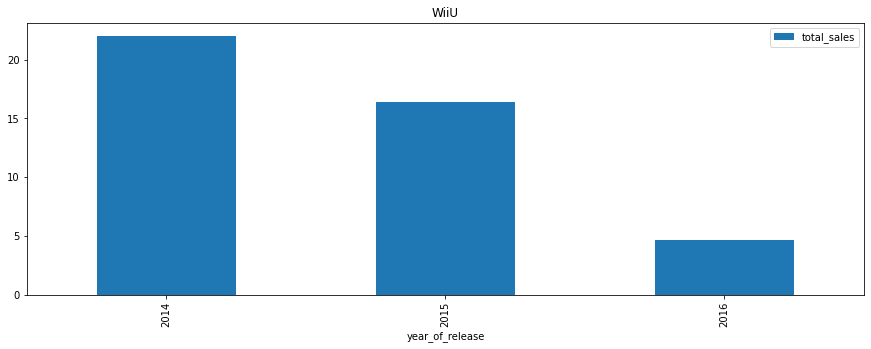

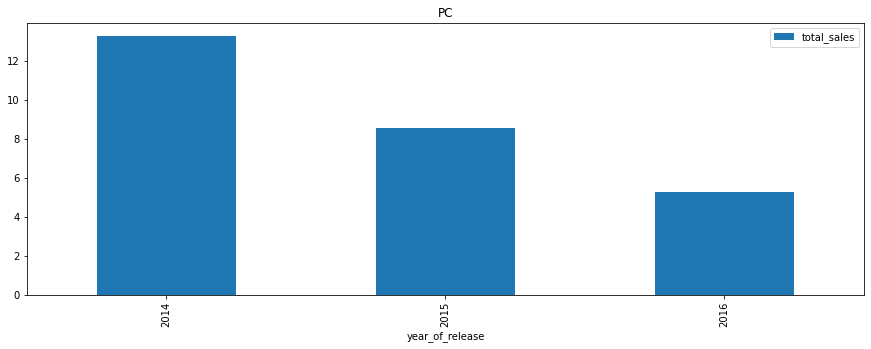

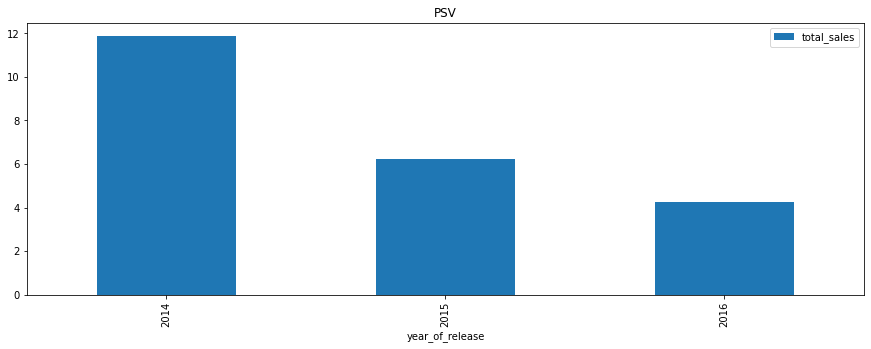

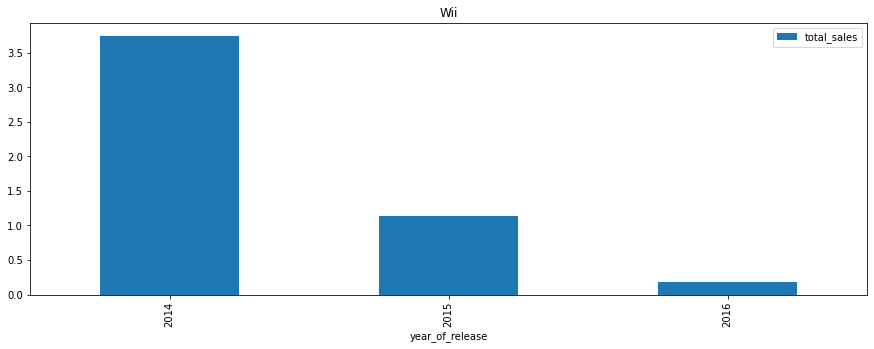

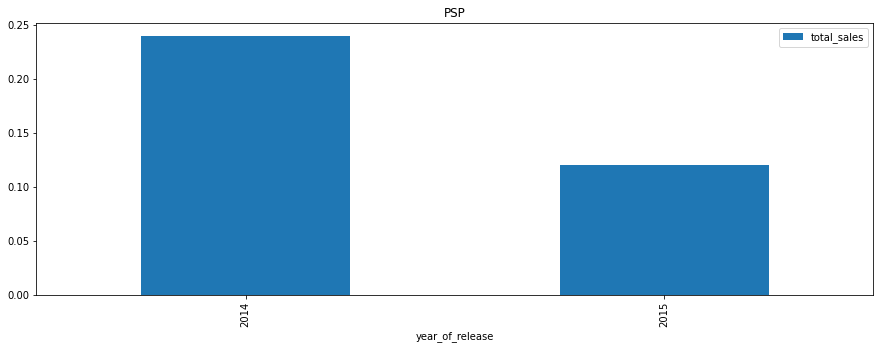

In [52]:
for platform in name_platform_final:
    data_sort[data_sort['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(15,5))
    plt.title(platform)

<div class="alert alert-info"> Лидируют по продажам за выбранный период PS4 и XOne, набирающие популярность, далее идут платформы теряющие свою популярность последние годы, поэтому самыми перспективными и являются PS4 и XOne.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

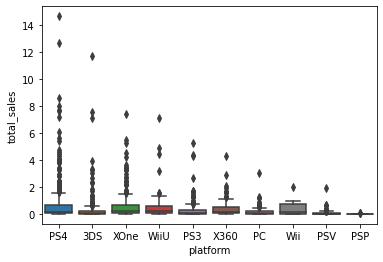

In [53]:
seaborn.boxplot(data=data_sort, x='platform', y='total_sales')

In [54]:
platform_topical = ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV','PSP']
game_platform_topical = data_sort[data_sort['platform'].isin(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV','PSP'])]
game_platform_topical = game_platform_topical[game_platform_topical['total_sales']<1.2]
game_platform_topical.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,non_critic_score,non_user_score,total_sales
1658,farming simulator 2015,PC,2014,Simulation,0.08,1.04,0.00,0.07,<NA>,NaN,Unknown,True,True,1.19
1672,captain toad: treasure tracker,WiiU,2014,Puzzle,0.53,0.38,0.19,0.09,81,8.6,E,False,False,1.19
1706,mad max (2015),PS4,2015,Action,0.36,0.59,0.04,0.18,<NA>,NaN,Unknown,True,True,1.17
1710,grand theft auto v,PC,2015,Action,0.39,0.69,0.00,0.09,96,7.9,M,False,False,1.17
1755,wwe 2k15,PS4,2014,Sports,0.39,0.57,0.00,0.19,62,5.1,T,False,False,1.15


Text(0, 0.5, 'Глобальные продажи')

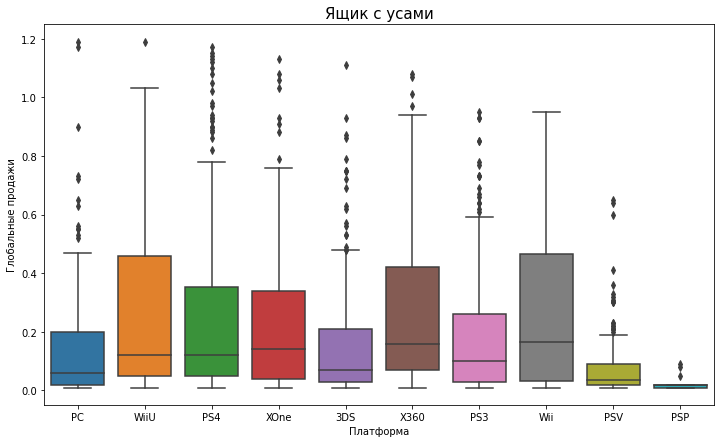

In [55]:
plt.figure(figsize=(12,7))
seaborn.boxplot(data=game_platform_topical, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

Отсортировав данные для наглядного отображения "ящика с усами" получили следующие данные:

Больше всего продаж у Х360, PS3 и Wii, далее идут и XOne и PS4 набирающие популярность, и замыкают теряющие популярность 3DS и PC

#### Построим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [56]:
PS3_pl = data_sort[data_sort['platform']=='PS3']
PS3_pl['user_score'].corr(PS3_pl['total_sales'])

-0.16676141347662118

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

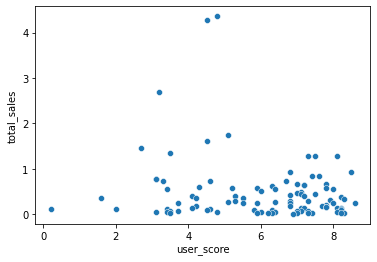

In [57]:
seaborn.scatterplot(x=PS3_pl['user_score'], y=PS3_pl['total_sales'])

In [58]:
PS3_pl['critic_score'] = PS3_pl['critic_score'].astype('float64')
PS3_pl['critic_score'].corr(PS3_pl['total_sales'])

/tmp/ipykernel_183/752655922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS3_pl['critic_score'] = PS3_pl['critic_score'].astype('float64')


0.44657460493190704

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

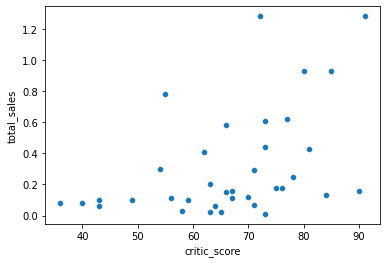

In [59]:
seaborn.scatterplot(x=PS3_pl['critic_score'], y=PS3_pl['total_sales'])

In [60]:
print(PS3_pl['non_critic_score'].value_counts())

True     183
False     36
Name: non_critic_score, dtype: int64


In [61]:
print(PS3_pl['non_user_score'].value_counts())

True     121
False     98
Name: non_user_score, dtype: int64


У продаж игр на PS3 есть слабая связь с отзывами пользователей и умеренная связь с отзывами критиков, однако, игр с оценкой критиков всего 16%, а с оценкой пользователей 45%, из чего можем сделать вывод, что оценки в общей доле не сильно оказывают влияние на продажи.

In [62]:
fDS_pl = data_sort[data_sort['platform']=='3DS']
print(fDS_pl['user_score'].corr(fDS_pl['total_sales']))
fDS_pl['critic_score'] = fDS_pl['critic_score'].astype('float64')
print(fDS_pl['critic_score'].corr(fDS_pl['total_sales']))

0.2151932718527028
0.314117492869051


/tmp/ipykernel_183/2877651694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fDS_pl['critic_score'] = fDS_pl['critic_score'].astype('float64')


In [63]:
print(fDS_pl['non_critic_score'].value_counts())
print(fDS_pl['non_user_score'].value_counts())

True     161
False     51
Name: non_critic_score, dtype: int64
True     157
False     55
Name: non_user_score, dtype: int64


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

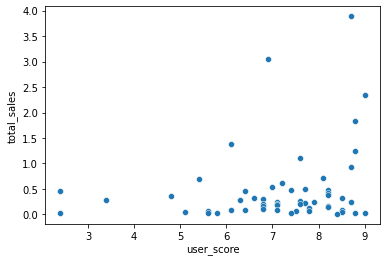

In [64]:
seaborn.scatterplot(x=fDS_pl['user_score'], y=fDS_pl['total_sales'])

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

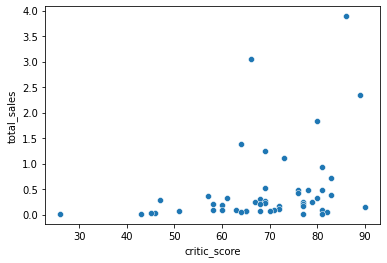

In [65]:
seaborn.scatterplot(x=fDS_pl['critic_score'], y=fDS_pl['total_sales'])

In [66]:
PC_pl = data_sort[data_sort['platform']=='PC']
print(PC_pl['user_score'].corr(PC_pl['total_sales']))
PC_pl['critic_score'] = PC_pl['critic_score'].astype('float64')
print(PC_pl['critic_score'].corr(PC_pl['total_sales']))

-0.07159665703472451
0.17463413769350036


/tmp/ipykernel_183/571240675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC_pl['critic_score'] = PC_pl['critic_score'].astype('float64')


In [67]:
print(PC_pl['non_critic_score'].value_counts())
print(PC_pl['non_user_score'].value_counts())

False    116
True      35
Name: non_critic_score, dtype: int64
False    122
True      29
Name: non_user_score, dtype: int64


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

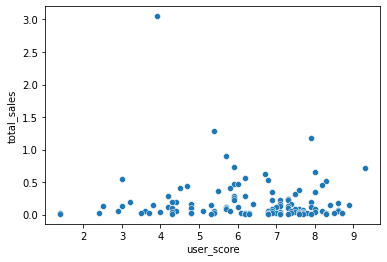

In [68]:
seaborn.scatterplot(x=PC_pl['user_score'], y=PC_pl['total_sales'])

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

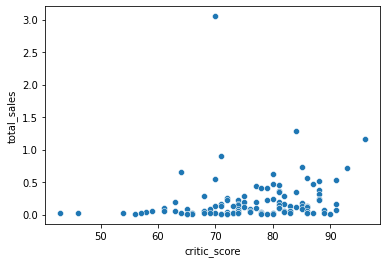

In [69]:
seaborn.scatterplot(x=PC_pl['critic_score'], y=PC_pl['total_sales'])

In [70]:
X360_pl = data_sort[data_sort['platform']=='X360']
print(X360_pl['user_score'].corr(X360_pl['total_sales']))
X360_pl['critic_score'] = X360_pl['critic_score'].astype('float64')
print(X360_pl['critic_score'].corr(X360_pl['total_sales']))

-0.138444570945665
0.5257228356581523


/tmp/ipykernel_183/1668876980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X360_pl['critic_score'] = X360_pl['critic_score'].astype('float64')


In [71]:
print(X360_pl['non_critic_score'].value_counts())
print(X360_pl['non_user_score'].value_counts())

True     85
False    26
Name: non_critic_score, dtype: int64
False    83
True     28
Name: non_user_score, dtype: int64


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

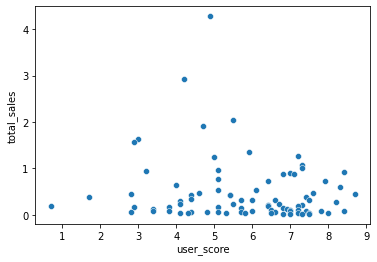

In [72]:
seaborn.scatterplot(x=X360_pl['user_score'], y=X360_pl['total_sales'])

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

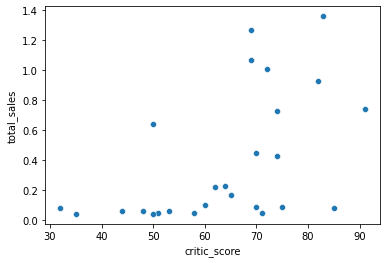

In [73]:
seaborn.scatterplot(x=X360_pl['critic_score'], y=X360_pl['total_sales'])

In [74]:
Wii_pl = data_sort[data_sort['platform']=='Wii']
print(Wii_pl['user_score'].corr(Wii_pl['total_sales']))
Wii_pl['critic_score'] = Wii_pl['critic_score'].astype('float64')
print(Wii_pl['critic_score'].corr(Wii_pl['total_sales']))

1.0
nan


/tmp/ipykernel_183/4136270443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wii_pl['critic_score'] = Wii_pl['critic_score'].astype('float64')


In [75]:
print(Wii_pl['non_critic_score'].value_counts())
print(Wii_pl['non_user_score'].value_counts())

True    11
Name: non_critic_score, dtype: int64
True     9
False    2
Name: non_user_score, dtype: int64


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

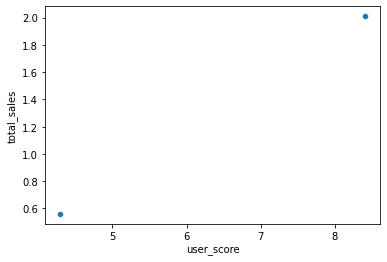

In [76]:
seaborn.scatterplot(x=Wii_pl['user_score'], y=Wii_pl['total_sales'])

<AxesSubplot:ylabel='total_sales'>

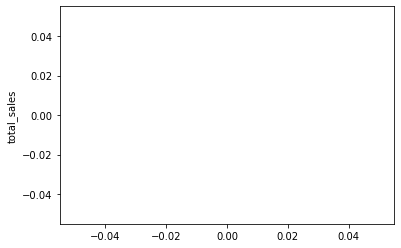

In [77]:
seaborn.scatterplot(x=Wii_pl['critic_score'], y=Wii_pl['total_sales'])

In [78]:
PS4_pl = data_sort[data_sort['platform']=='PS4']
print(PS4_pl['user_score'].corr(PS4_pl['total_sales']))
PS4_pl['critic_score'] = PS4_pl['critic_score'].astype('float64')
print(PS4_pl['critic_score'].corr(PS4_pl['total_sales']))

-0.040131589472697356
0.40266141068104083


/tmp/ipykernel_183/1730725833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS4_pl['critic_score'] = PS4_pl['critic_score'].astype('float64')


In [79]:
print(PS4_pl['non_critic_score'].value_counts())
print(PS4_pl['non_user_score'].value_counts())

False    237
True     139
Name: non_critic_score, dtype: int64
False    242
True     134
Name: non_user_score, dtype: int64


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

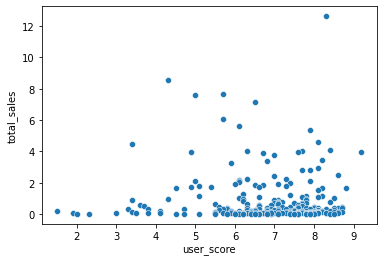

In [80]:
seaborn.scatterplot(x=PS4_pl['user_score'], y=PS4_pl['total_sales'])

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

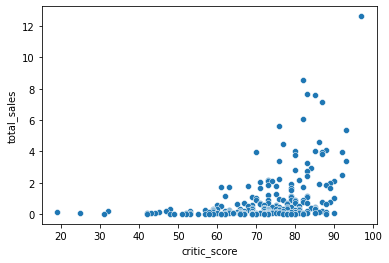

In [81]:
seaborn.scatterplot(x=PS4_pl['critic_score'], y=PS4_pl['total_sales'])

In [82]:
XOne_pl = data_sort[data_sort['platform']=='XOne']
print(XOne_pl['user_score'].corr(XOne_pl['total_sales']))
XOne_pl['critic_score'] = XOne_pl['critic_score'].astype('float64')
print(XOne_pl['critic_score'].corr(XOne_pl['total_sales']))

-0.0703839280647581
0.42867694370333226


/tmp/ipykernel_183/1055593442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XOne_pl['critic_score'] = XOne_pl['critic_score'].astype('float64')


In [83]:
print(XOne_pl['non_critic_score'].value_counts())
print(XOne_pl['non_user_score'].value_counts())

False    155
True      73
Name: non_critic_score, dtype: int64
False    165
True      63
Name: non_user_score, dtype: int64


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

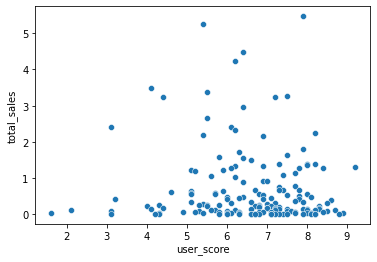

In [84]:
seaborn.scatterplot(x=XOne_pl['user_score'], y=XOne_pl['total_sales'])

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

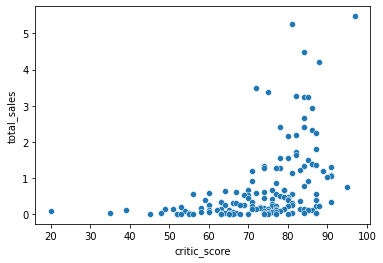

In [85]:
seaborn.scatterplot(x=XOne_pl['critic_score'], y=XOne_pl['total_sales'])

In [86]:
WiiU_pl = data_sort[data_sort['platform']=='WiiU']
print(WiiU_pl['user_score'].corr(WiiU_pl['total_sales']))
WiiU_pl['critic_score'] = WiiU_pl['critic_score'].astype('float64')
print(WiiU_pl['critic_score'].corr(WiiU_pl['total_sales']))

0.40792645792170773
0.370201412480884


/tmp/ipykernel_183/3455068437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WiiU_pl['critic_score'] = WiiU_pl['critic_score'].astype('float64')


In [87]:
print(WiiU_pl['non_critic_score'].value_counts())
print(WiiU_pl['non_user_score'].value_counts())

False    43
True     30
Name: non_critic_score, dtype: int64
False    48
True     25
Name: non_user_score, dtype: int64


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

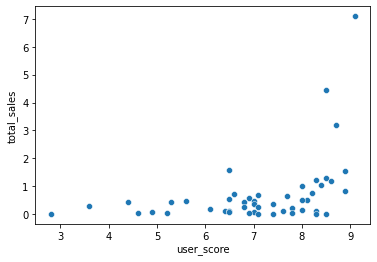

In [88]:
seaborn.scatterplot(x=WiiU_pl['user_score'], y=WiiU_pl['total_sales'])

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

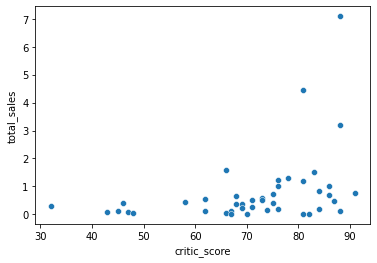

In [89]:
seaborn.scatterplot(x=WiiU_pl['critic_score'], y=WiiU_pl['total_sales'])

In [90]:
PSV_pl = data_sort[data_sort['platform']=='PSV']
print(PSV_pl['user_score'].corr(PSV_pl['total_sales']))
PSV_pl['critic_score'] = PSV_pl['critic_score'].astype('float64')
print(PSV_pl['critic_score'].corr(PSV_pl['total_sales']))

-0.16845504978064446
0.04266490657009526


/tmp/ipykernel_183/3681466832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PSV_pl['critic_score'] = PSV_pl['critic_score'].astype('float64')


In [91]:
print(PSV_pl['non_critic_score'].value_counts())
print(PSV_pl['non_user_score'].value_counts())

True     241
False     54
Name: non_critic_score, dtype: int64
True     222
False     73
Name: non_user_score, dtype: int64


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

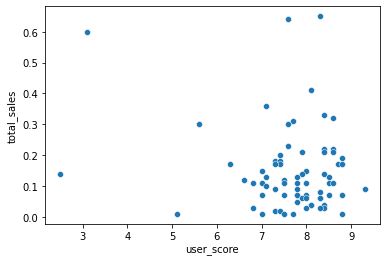

In [92]:
seaborn.scatterplot(x=PSV_pl['user_score'], y=PSV_pl['total_sales'])

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

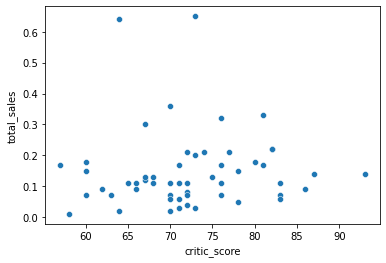

In [93]:
seaborn.scatterplot(x=PSV_pl['critic_score'], y=PSV_pl['total_sales'])

In [94]:
PSP_pl = data_sort[data_sort['platform']=='PSP']
print(PSP_pl['user_score'].corr(PSP_pl['total_sales']))
PSP_pl['critic_score'] = PSP_pl['critic_score'].astype('float64')
print(PSP_pl['critic_score'].corr(PSP_pl['total_sales']))

nan
nan


/tmp/ipykernel_183/3468761128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PSP_pl['critic_score'] = PSP_pl['critic_score'].astype('float64')


In [95]:
print(PSP_pl['non_critic_score'].value_counts())
print(PSP_pl['non_user_score'].value_counts())

True    13
Name: non_critic_score, dtype: int64
True    13
Name: non_user_score, dtype: int64


<AxesSubplot:ylabel='total_sales'>

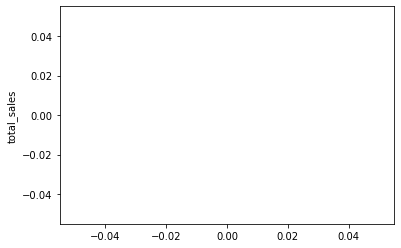

In [96]:
seaborn.scatterplot(x=PSP_pl['user_score'], y=PSP_pl['total_sales'])

<AxesSubplot:ylabel='total_sales'>

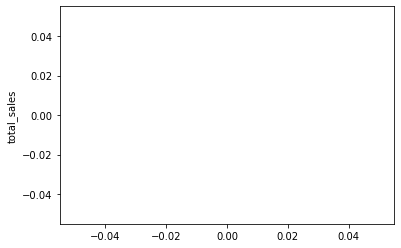

In [97]:
seaborn.scatterplot(x=PSP_pl['critic_score'], y=PSP_pl['total_sales'])

Таким образом, можно сделать следующий вывод:

* У продаж игр на PS3 есть слабая связь с отзывами пользователей и умеренная связь с отзывами критиков, однако, игр с оценкой критиков всего 16%, а с оценкой пользователей 45%.
* У продаж игр на 3DS есть слабая связь с отзывами пользователей и умеренная связь с отзывами критиков (игр с оценкой критиков  24%, а с оценкой пользователей 26%).
* У продаж игр на PC отсутствует связь с отзывами пользователей и слабая связь с отзывами критиков (игр с оценкой критиков  23%, а с оценкой пользователей 19%).
* У продаж игр на X360 есть слабая связь с отзывами пользователей и умеренная связь с отзывами критиков (игр с оценкой критиков  26%, а с оценкой пользователей 25%).
* У продаж игр на Wii есть слабая связь с отзывами пользователей и нет отзывов критиков вовсе (игр с оценкой пользователей 18%).
* У продаж игр на PS4 отстутствует связь с отзывами пользователей и умеренная связь с отзывами критиков (игр с оценкой критиков  37%, а с оценкой пользователей 36%).
* У продаж игр на XOne отстутствует связь с отзывами пользователей и умеренная связь с отзывами критиков (игр с оценкой критиков  32%, а с оценкой пользователей 28%).
* У продаж игр на WiiU есть умеренная связь с отзывами пользователей и умеренная связь с отзывами критиков (игр с оценкой критиков  41%, а с оценкой пользователей 34%).
* У продаж игр на PSV отстутствует связь с отзывами пользователей и слабая связь с отзывами критиков (игр с оценкой критиков  18%, а с оценкой пользователей 25%).
* У PSP вовсе отсутствуют отзывы

То есть, связь с отзывами пользователей в целом незначительна, а с отзывами критиков связь умеренная, но так как отзывы есть у меньшей части игр, поэтому только на отзывы опираться не стоит.

#### Построим на общее распределение игр по жанрам

Text(0.5, 1.0, 'Продажи по жанрам')

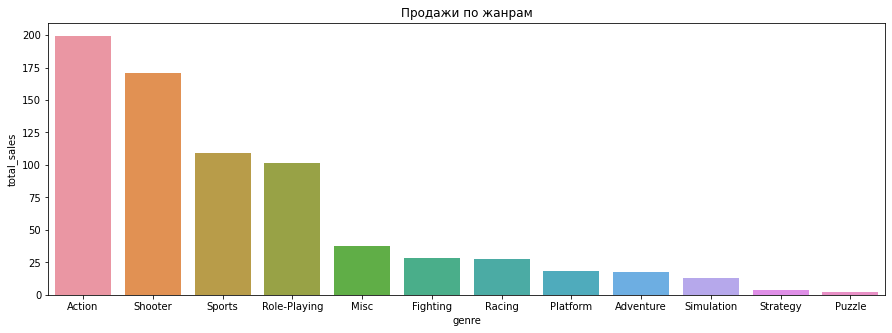

In [98]:
genre_sort = data_sort.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=genre_sort.index,y=genre_sort['total_sales'])
plt.title('Продажи по жанрам')

Text(0.5, 1.0, 'Средние продажи по жанрам')

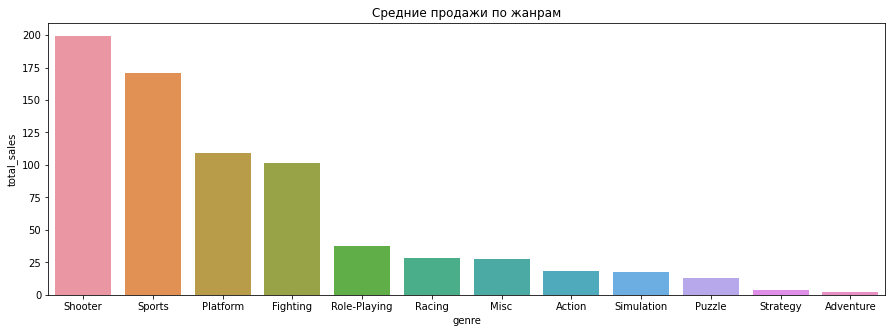

In [99]:
genre_sort_mean = data_sort.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=genre_sort_mean.index,y=genre_sort['total_sales'])
plt.title('Средние продажи по жанрам')

<div class="alert alert-info"> Заметно, что по общим продажам жанр Action продается лучше остальных, следом идут Shooter и Shooter, самыми непопулярными являются Adventure, Strategy и Puzzle. Однако если судить по средним продажам то предпочтения отходят Shooter, Shooter и Platform. Исходя из этих данных можно сделать вывод что лучше всего продаются более сложные игры.

**Таким образом, нужно иметь в виду, что рост продаж ожидается у платформ PS4 и XOne, самыми успешными являются жанры Shooter, Shooter и Platform, и также немаловажным фактором при продажах являются отзывы критиков.**

### Портрет пользователя каждого региона

#### Портрет пользователя Северной Америки

Text(0.5, 1.0, 'Продажи по платформам')

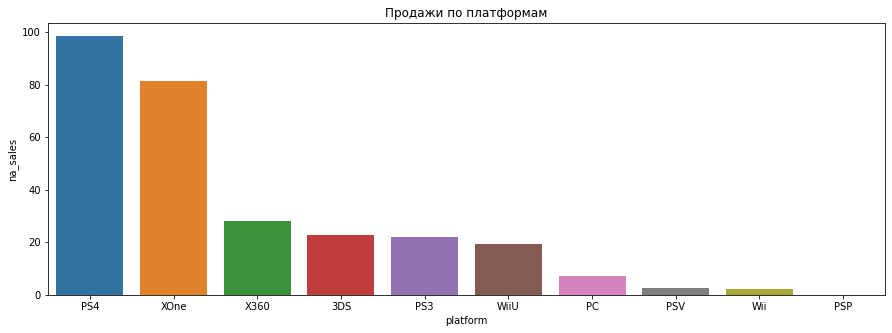

In [100]:
platform_NA = data_sort.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=platform_NA.index,y=platform_NA['na_sales'])
plt.title('Продажи по платформам')

Text(0.5, 1.0, 'Продажи по жанрам')

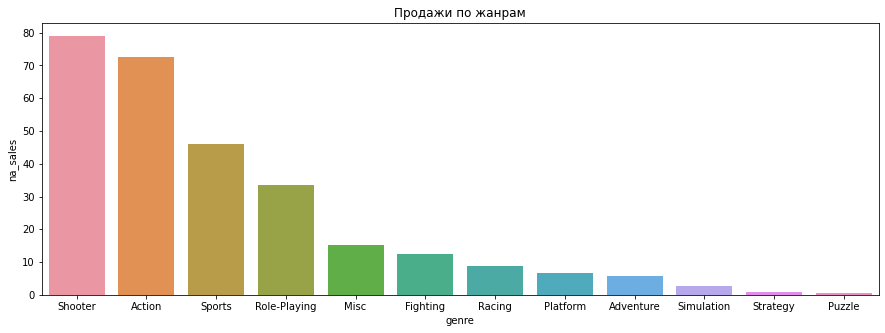

In [101]:
genre_NA = data_sort.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=genre_NA.index,y=genre_NA['na_sales'])
plt.title('Продажи по жанрам')

Text(0.5, 1.0, 'Продажи по возрастной категории')

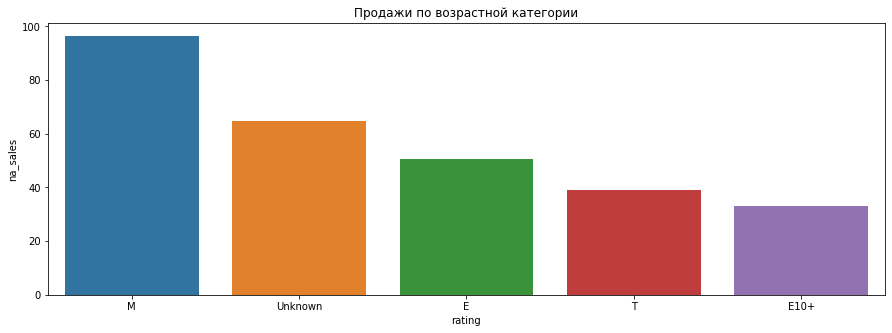

In [102]:
rating_NA = data_sort.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=rating_NA.index,y=rating_NA['na_sales'])
plt.title('Продажи по возрастной категории')

Пользователь из Северной Америки предпочитает в основном игры на X360, чуть меньше на PS3 и Wii и замыкает пятерку PS4 и XOne. Играют в основном в Action, Shooter, Sports, Misk и Role-Playing. По возрастному цензу предпочитают в основном для 17+, игры без рейтинга, 6+, 13+, 10+ и совсем мало 3+.

#### Портрет пользователя Европы

Text(0.5, 1.0, 'Продажи по платформам')

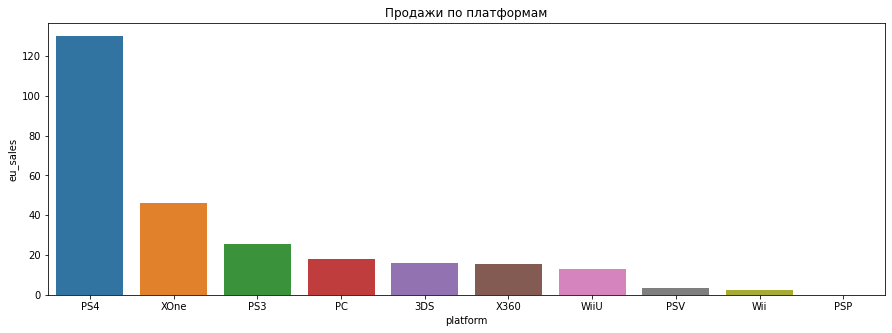

In [103]:
platform_EA = data_sort.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=platform_EA.index,y=platform_EA['eu_sales'])
plt.title('Продажи по платформам')

Text(0.5, 1.0, 'Продажи по жанрам')

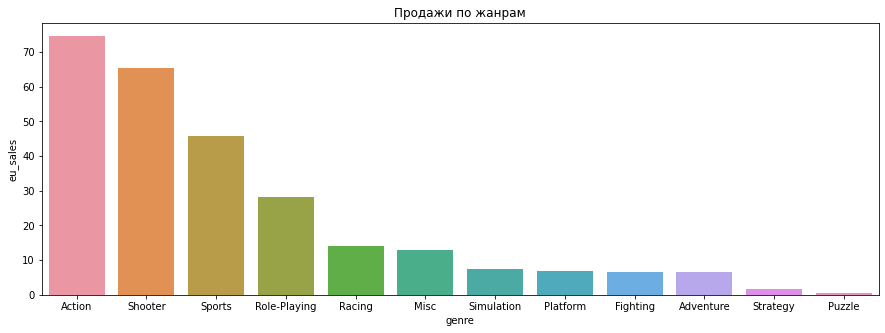

In [104]:
genre_EA = data_sort.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=genre_EA.index,y=genre_EA['eu_sales'])
plt.title('Продажи по жанрам')

Text(0.5, 1.0, 'Продажи по возрастной категории')

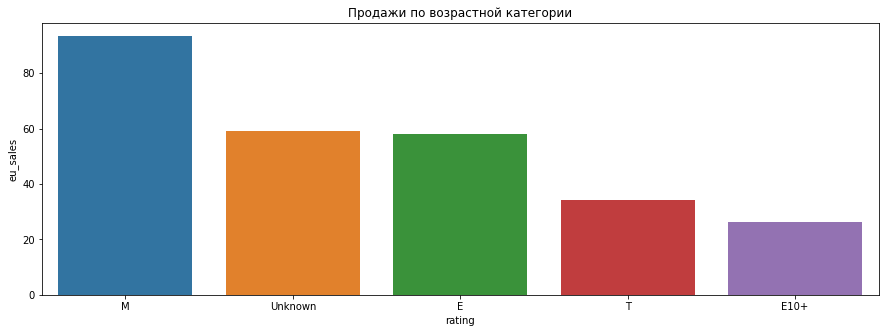

In [105]:
rating_EA = data_sort.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=rating_EA.index,y=rating_EA['eu_sales'])
plt.title('Продажи по возрастной категории')

Пользователь из Европы предпочитает в основном игры на PS3 далее идут X360, Wii, PS4 и PC. Играют в основном в Action, Shooter, Sports, Misk и Racing. По возрастному цензу предпочитают в основном для 17+, далее идут игры без рейтинга, 6+, 13+ и 10+.

#### Портрет пользователя Японии

Text(0.5, 1.0, 'Продажи по платформам')

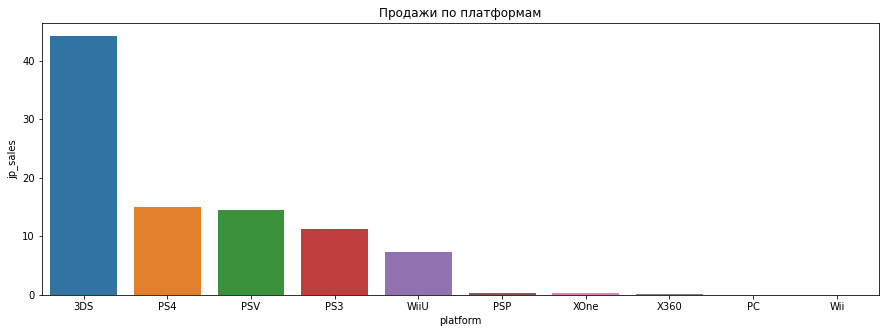

In [106]:
platform_JP = data_sort.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=platform_JP.index,y=platform_JP['jp_sales'])
plt.title('Продажи по платформам')

Text(0.5, 1.0, 'Продажи по жанрам')

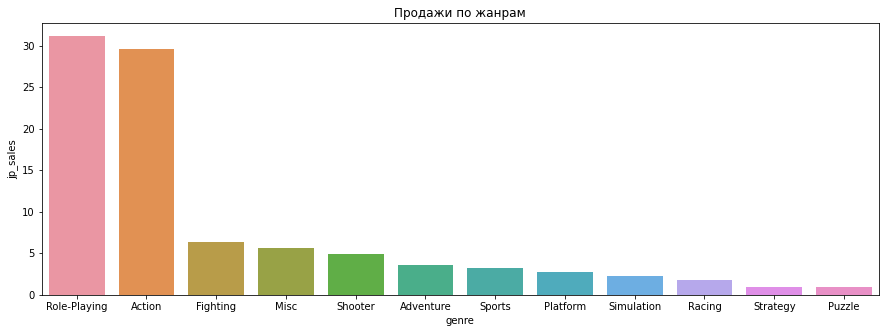

In [107]:
platform_JP = data_sort.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=platform_JP.index,y=platform_JP['jp_sales'])
plt.title('Продажи по жанрам')

Text(0.5, 1.0, 'Продажи по возрастной категории')

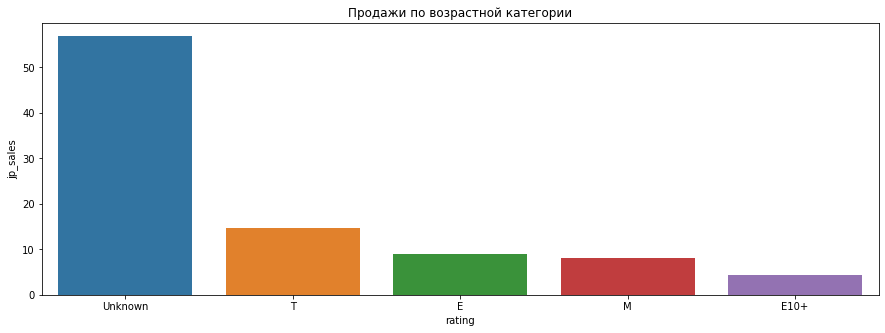

In [108]:
platform_JP = data_sort.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False)

plt.figure(figsize=(15,5))
seaborn.barplot(x=platform_JP.index,y=platform_JP['jp_sales'])
plt.title('Продажи по возрастной категории')

Пользователь из Японии предпочитает в основном игры на 3DS далее идут PS3, Wii, PS4 и X360. Играют в основном в Role-Playing, Action, Sports, Platform и Misk. По возрастному цензу предпочитают в основном игры без рейтинга, далее идут 6+, 13+, 17+ и 10+.

Таким образом, есть отличия в разных регионах как по платформам так и по жанрам, но стоить отметить что пользователь из Европы похож на пользователя из Северной Америки, в отличии от Японии, где больше играют в игры без оганичений по возрасту.

### Проверим гипотезы

#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [109]:
Xbox_one_rat = data_sort[(data_sort['platform']=='XOne')]['user_score']
PC_rat = data_sort[(data_sort['platform']=='PC')]['user_score']

In [110]:
Xbox_one_rat.isna().sum()

63

In [111]:
PC_rat.isna().sum()

29

In [112]:
Xbox_one_rat = Xbox_one_rat.dropna()
PC_rat = PC_rat.dropna()

In [113]:
print(np.var(Xbox_one_rat))
print(np.var(PC_rat))

1.8795460055096425
2.8773743617307175


In [114]:
from scipy import stats as st
alpha = .05 

results = st.ttest_ind(
    Xbox_one_rat, 
    PC_rat,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Таким образом, средние пользовательские рейтинги платформ Xbox One и PC одинаковые, вероятность случайно получить одинаковое значение рейтинга равно 11%

#### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые 

H1: Средние пользовательские рейтинги жанров Action и Sport различаются

In [115]:
Action_rat = data_sort[(data_sort['genre']=='Action')]['user_score']
Sports_rat = data_sort[(data_sort['genre']=='Sports')]['user_score']

In [116]:
Action_rat.isna().sum()

322

In [117]:
Sports_rat.isna().sum()

34

In [118]:
Action_rat = Action_rat.dropna()
Sports_rat = Sports_rat.dropna()

In [119]:
print(np.var(Action_rat))
print(np.var(Sports_rat))

1.89208448117539
3.4198375596751185


In [120]:
alpha = .05 

results = st.ttest_ind(
    Action_rat, 
    Sports_rat,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Таким образом, средние пользовательские рейтинги жанров Action и Sport различаются, вероятность случайно получить одинаковое значение рейтинга равно 8,1*(10^-14)%

<div class="alert alert-info"> Таким образом, можно сделать вывод, что в самых перспективных платформах Xbox One и PC средние пользовательские рейтинги не отличаются, и в целом отличий для пользователей нет при выборе определенной игры для своей платформы. А вот от жанров Action и Sports ожидание разное у пользователей, поэтому разработчику стоит это учитывать при выводе новой игры на рынок.

### Общий вывод

Анализируя данные о продаже игр на разных платформах по всему миру, были сделаны следующие выводы:

1) Были выявлены пропуски в 6 столбцах, а также неправильные типы данных в 2 столбцах.

2) Были удалены пропуси в столбцах с названиями игр и в датах выпуска, так как их количество не велико, и проще удалить эти данные, в остальных столбцах от пропусков избавиться не удалось. Также был добавлен столбец и общими продажами по всему миру.

3) Анализируя данные, мы заметили, что выпуск игр от 1980 до 2000 годов увеличивался, но не сильно критично, что связанно с малым распростронением компьютеров и приставок в целом, и с силой железа. В 2002 случился резкий скачек выпуска игр почти в 2 раза. Скорее всего это связанно с выходом самой продаваемой приставкой в мире PS2 (продажи начались в 2000 году). Наблюдается закономерность в среднием сроке жизни платформы, она составляет около 8-9 лет, пик популярности приходит примерно на 5 год, после чего идет постепенное падение. Исключением является PC, так как у компьютеров железо обновляется, и платформа живет долгое время. Далее оставили для анализа только данные по платформам 3DS, PC, X360, PS3, Wii, PS4, XOne, WiiU, PSV, PSP (хоть некоторые из этих платформ уже на спаде популярности, но для анализа они еще пригодны). Было выявлено, что больше всего продаж у XOne и PS4 набирающие популярность, и остальные платформы заметно уступают в продажах игр. В рамках исследования была выявлена умеренная связь продаж с отзывами критиков, но так как процент отзывов не велик, отталкиваться только от них нецелесобразно. По общим продажам жанр Action продается лучше остальных, следом идут Shooter и Shooter, самыми непопулярными являются Adventure, Strategy и Puzzle. Однако если судить по средним продажам то предпочтения отходят Shooter, Shooter и Platform. Исходя из этих данных можно сделать вывод что лучше всего продаются более сложные игры.

4) Были составлены образы покупателей игр:
* Пользователь из Северной Америки предпочитает в основном игры на X360, чуть меньше на PS3 и Wii и замыкает пятерку PS4 и XOne. Играют в основном в Action, Shooter, Sports, Misk и Role-Playing. По возрастному цензу предпочитают в основном для 17+, игры без рейтинга, 6+, 13+, 10+ и совсем мало 3+.
* Пользователь из Европы предпочитает в основном игры на PS3 далее идут X360, Wii, PS4 и PC. Играют в основном в Action, Shooter, Sports, Misk и Racing. По возрастному цензу предпочитают в основном для 17+, далее идут игры без рейтинга, 6+, 13+ и 10+.
* Пользователь из Японии предпочитает в основном игры на 3DS далее идут PS3, Wii, PS4 и X360. Играют в основном в Role-Playing, Action, Sports, Platform и Misk. По возрастному цензу предпочитают в основном игры без рейтинга, далее идут 6+, 13+, 17+ и 10+.


Таким образом, есть отличия в разных регионах как по платформам так и по жанрам, но стоить отметить что пользователь из Европы похож на пользователя из Северной Америки, в отличии от Японии, где больше играют в игры без оганичений по возрасту.

4) Были доказаны гепотизы, что средние пользовательские рейтинги жанров Action и Sports одинаковые, и что средние пользовательские рейтинги жанров Action и Sport различаются. 

Таким образом, чтобы максимизировать продажи разработчику игр, необходимо делать ставки на разработку игр на новых платформах, таких как XOne и PS4, в жанре Shooter, Shooter и Platform без возрастного ограничения. Также стоит уделить внимание при проведении рекламной компании, что отзывы критиков влияют на объем продаж.



